# **Data Science | Remote Internship | Oasis InfoByte**
## **Task 04: Email Spam detection with Machine Learning:**
  - We have all been the recipient of spam emails before, Spam mail, or junk mail is a type of email that is sent to a  massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

---

## **Step 1: Importing Libraries and Handling Warnings:**

  - This step involves importing necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, and scikit-learn. Warnings are suppressed for a cleaner output. The figure size for visualizations is set, and the dataset is loaded.

In [55]:
# Import Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

 - #### Hide all Warnings: 

In [56]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12,6]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

---

## **Step 2: Load the Dataset:**

In [57]:
# Load Dataset:  
try:
    df = pd.read_csv("spam.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin1' encoding
    df = pd.read_csv("spam.csv", encoding='latin1')

---

## **Step 3: Data Exploration:**

In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


 - #### **Display basic information about the dataset**

In [59]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [60]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [61]:
print(f"The Names of Columns in this dataset are as follow:\n\n {df.columns}")

The Names of Columns in this dataset are as follow:

 Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [62]:
print(f"The Numbers of Rows are: {df.shape[0]}, Columns are: {df.shape[1]}")

The Numbers of Rows are: 5572, Columns are: 5


 - #### **Summarize (Summary Statistics)**

In [63]:
# Summarize (Summary Statistics)
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


- #### **Drop unnecessary columns**

In [64]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

- #### **Rename columns for clarity**

In [65]:
# Rename columns for clarity
df.columns = ['Label', 'Message']

In [66]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- #### **find total number of missing values**

In [67]:
# find missing value
df.isnull().sum().sort_values(ascending=False)

Label      0
Message    0
dtype: int64

---

## **Step 4: Data Visualization:**

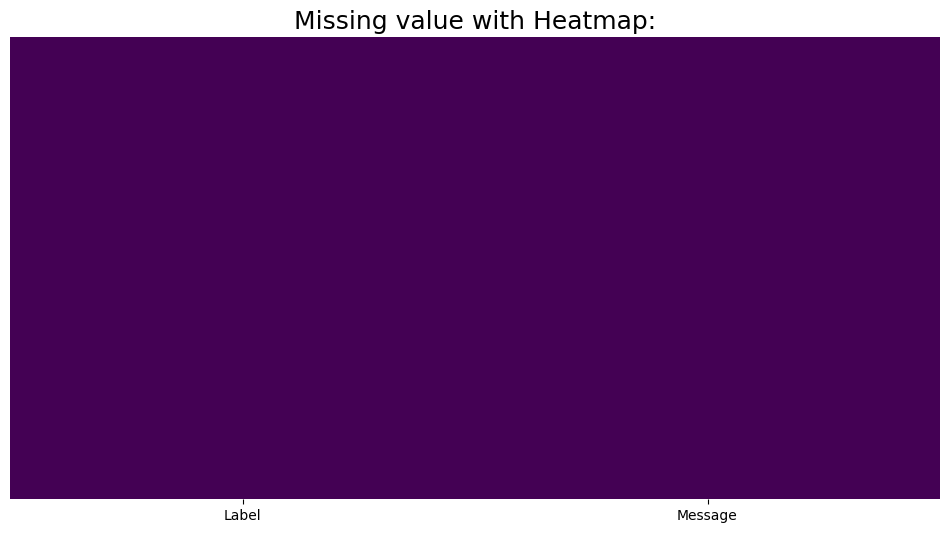

In [68]:
# find missing value with heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing value with Heatmap:", fontsize=18)
plt.show()

- #### **Bar chart for spam/ham distribution**

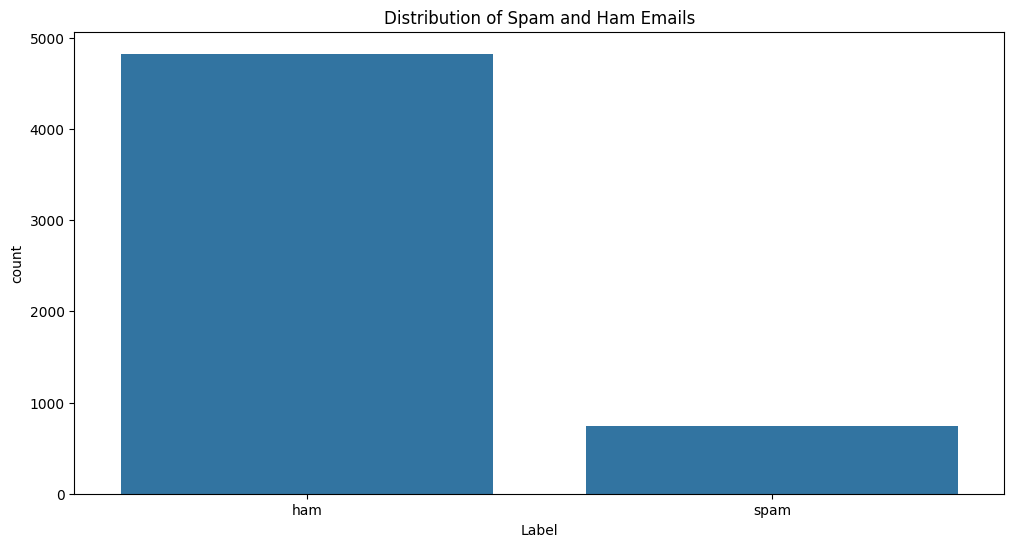

In [69]:
# Bar chart for spam/ham distribution
sns.countplot(x='Label', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.show()

- #### **Histogram for Message length**

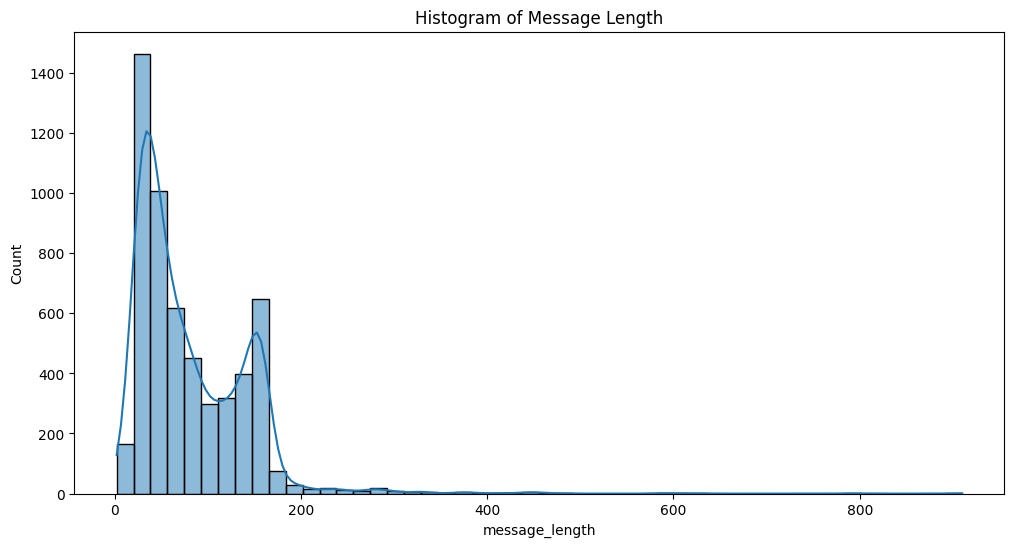

In [70]:
# Histogram for message length
df['message_length'] = df['Message'].apply(len)
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Histogram of Message Length')
plt.show()

- #### **Pair Plot of Label and Message Features:**

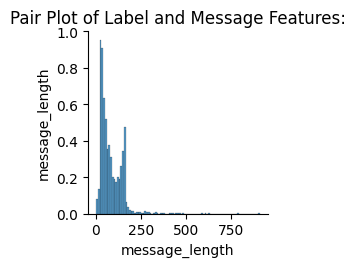

In [71]:
# Multiple charts (Pair plot)
sns.pairplot(df)
plt.title('Pair Plot of Label and Message Features:')
plt.show()

---

## **Step 5: Data Pre-processing:**

- #### **Convert Labels to numerical values (spam: 1, ham: 0)**

In [72]:
# Convert labels to numerical values (spam: 1, ham: 0)
df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

---

## **Step 6: Feature Extraction:**
  - #### **Use CountVectorizer to convert text data into a bag-of-words model**

In [73]:
# Use CountVectorizer to convert text data into a bag-of-words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])

---

## **Step 7: Split the Data:**

 - #### **Split the data into training and testing sets**

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)

---

## **Step 8: Train the Model:**
 - #### **Use `Multinomial Naive Bayes` for `Email Spam Detection`**

In [75]:
# Use Multinomial Naive Bayes for email spam detection
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train, y_train)

MultinomialNB()

---

## **Step 9: Evaluate the Model:**
  - #### **Make predictions on the test set**

In [76]:
# Make predictions on the test set
predictions = spam_classifier.predict(X_test)

 - #### **Calculate accuracy and display confusion matrix & Classification Report**

In [77]:
# Calculate accuracy and display confusion matrix
accuracy = round(accuracy_score(y_test, predictions) * 100,2)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

 - #### **Model Accuracy:**

In [78]:
print(f'Model Accuracy: {accuracy} %')

Model Accuracy: 97.85 %


- #### **Confusion Matrix:**

In [79]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[952  13]
 [ 11 139]]


 - #### **Classification Report:** 

In [80]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



---

## **Step 10: User Input and Prediction**
  - #### **Take user input for email text**

In [90]:
# Take user input for email text
user_input = input("Enter an Email text: ")
user_input_transformed = vectorizer.transform([user_input])

 - #### **Print User Input:**

In [91]:
print("Email is: ",user_input)

Email is:  Mobile Movie Club: To use your credit.


 - #### **Predict whether the email is spam or ham**

In [92]:
# Predict whether the email is spam or ham
prediction = spam_classifier.predict(user_input_transformed)

In [93]:
if prediction[0] == 1:
    print("This email is classified as spam.")
else:
    print("This email is classified as ham.") 

This email is classified as spam.
